# Neural & Behavioral Modeling - Week 3 (Exercises)
by 張天瑋 B09705049 (b09705049@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

rcParams["figure.figsize"] = (10, 10)

## 1 Replicate exisiting findings/models (10 points)
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology] 

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://kknews.cc/zh-tw/news/p56pbrp.html">MIT Matching Game</a>

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

6. Henriques, G. J., Simon, B., Ispolatov, Y., & Doebeli, M. (2019). <a href="https://www.pnas.org/content/116/28/14089">Acculturation drives the evolution of intergroup conflict</a>. Proceedings of the National Academy of Sciences, 116(28), 14089-14097.

0 [98, 99]
1 [100, 94]
2 [89, 91]
3 [87, 90]
4 [86, 97]
5 [84, 83]
6 [91, 100]
7 [82, 84]
8 [97, 99]
9 [78, 79]
10 [93, 94]
11 [99, 95]
12 [98, 94]
13 [73, 80]
14 [95, 98]
15 [67, 67]
16 [71, 73]
17 [68, 66]
18 [84, 75]
19 [100, 97]
20 [60, 59]
21 [63, 69]
22 [62, 69]
23 [93, 100]
24 [64, 78]
25 [54, 71]
26 [59, 55]
27 [61, 54]
28 [50, 62]
29 [56, 69]
30 [98, 99]
31 [47, 53]
32 [47, 46]
33 [54, 62]
34 [94, 97]
35 [42, 45]
36 [43, 46]
37 [87, 86]
38 [52, 38]
39 [98, 87]
40 [53, 40]
41 [85, 92]
42 [39, 45]
43 [40, 38]
44 [34, 40]
45 [42, 38]
46 [36, 48]
47 [36, 36]
48 [33, 42]
49 [38, 37]
50 [29, 30]
51 [40, 49]
52 [96, 92]
53 [30, 36]
54 [39, 42]
55 [36, 23]
56 [34, 30]
57 [31, 28]
58 [54, 31]
59 [41, 44]
60 [37, 28]
61 [46, 36]
62 [70, 87]
63 [31, 34]
64 [76, 99]
65 [32, 31]
66 [99, 97]
67 [26, 28]
68 [62, 91]
69 [44, 45]
70 [45, 31]
71 [22, 40]
72 [94, 89]
73 [24, 45]
74 [85, 88]
75 [21, 25]
76 [24, 25]
77 [23, 36]
78 [21, 42]
79 [25, 39]
80 [25, 45]
81 [100, 97]
82 [41, 25]
83 [84, 8

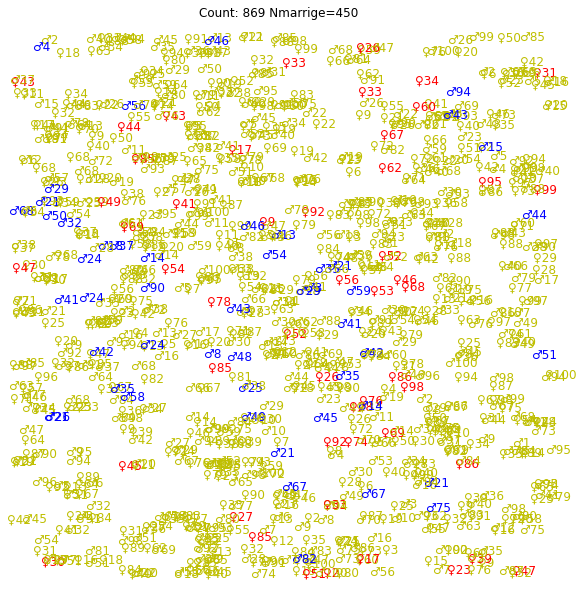

In [2]:
import time

# Model parameters:
Npeople=1000 
sz=50 # grid size
MarriageRecord = []

# Supporting functions:
class Person:
    def __init__(self,grid,sex):
        grid_size = len(grid)
        self.sex = sex
        if sex == 0 :
            self.color = 'r'
        else :
            self.color = 'b'
        self.score = random.randint(1,101)
        self.xy = random.randint(0,grid_size,2) # locations
        self.married = False
        self.target = 100.0
        self.fail = 0
        
    def move(self,grid):
        grid_size = len(grid)
        self.xy += random.randint(-1,1,2) # stay or move to its neighboring locations
        self.xy = mod(self.xy,grid_size) # cyclic boundary
        self.target -= 0.5
        
    def pursue(self,people):
        candidates = [person for person in people if person.sex != self.sex and person.married == False and (person.xy == self.xy).all()]
        for c in candidates:
            if c.score >= self.target :
                if (c.respond(self)) :
                    self.married = True
                    self.color = 'y'
                    MarriageRecord.append([self.score , c.score])
                    # print(len(MarriageRecord) , [self.score , c.score])
                    break
                else :
                    self.fail += 1
                    self.target -= 0.5
    def respond(self , pursuer):
        if pursuer.score >= self.target :
            self.married = True
            self.color = 'y'
            return True
        else :
            self.target = max(100 , self.target + 0.2)
            return False
        
def plot_world(t, grid, agents):
    sz = len(grid)
    clf() # clear previous figure
    spy(grid,alpha = 0.1)
    for a in agents:
        if a.sex == 0 :
            sexText = '♀'
        else:
            sexText = '♂'
        offset = (random.rand(2)-1)/2 # adding some positional offsets to avoid overlapping of agents
        text(a.xy[1] + offset[1], a.xy[0] + offset[0], sexText + str(a.score) , {'size':12,'color':a.color})
    title(f'Count: {t} Nmarrige=' + str(len(MarriageRecord)))
    axis('off')
    display(gcf()); clear_output(wait = True) # to allow dynamic plots

# Initialization:
grid = zeros((sz,sz)) # try eye(sz)
people = [Person(grid, i // (Npeople / 2)) for i in range(Npeople)] # assign each person to a location

# Simulation:
Nmarrige = len(MarriageRecord)
for t in range (1000):
    for person in people:
        if person.married == False :
            person.pursue(people)
            person.move(grid)
    plot_world(t,grid,people) # Plot new results
    if len(MarriageRecord) >= 450:
        break
for i in range(len(MarriageRecord)):
    print(i , MarriageRecord[i])